# WHETGEO-2D
## Kirkland et al. 1992, test problem 2

    -Authors: Niccolò Tubini, Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License

----
**This notebook is freely inspired to the Notebooks presented in Clark et al. (2021)**

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta-data)
* [Reference](#Reference)
* [Computational grid](#Computational-grid)
* [Visualize the output](#Visualize-the-output)
    * [Saturation degree](#Saturation-degree)




## Expectations
The simulation should reproduce the results of the test problem 2 presented in Kirkland et al. (1992).
<figure>
    <center>
    <img src="Figures/Kirkland_et_al_1992_TP2.PNG" width="400" height="400/1.618">
    <figcaption>Figure (12) in Mc Bride (2006). </figcaption>
    </center>
</figure>

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-2D |
| Model version  |  v0.9-beta |
| Model reference | Tubini and Rigon (2022) |
| Grid input file | `data/mesh/Kirkland_et_al_1992_TP2.mesh` |
| Boundary condition file | `data/Timeseries/Kirkland_et_al_1992/Kirkland_et_al_1992_TP2.csv` |
| .sim file | `simulation/WHETGEO2D_Kirkland_1992_TP2.sim` |
| Model runs by | E. Borinato|
| Notebook code by | N. Tubini | 

## Reference

- Clark, M.P., Zolfaghari, R., Green, K.R., Trim, S.J., Knoben, W.J., Bennett, A.R., Nijssen, B., Ireson, A.M., & Spiteri, R.J. (2021). The numerical implementation of land models: Problem formulation and laugh tests. Journal of Hydrometeorology.

- Kirkland, M. R., Hills, R. G., & Wierenga, P. J. (1992). Algorithms for solving Richards' equation for variably saturated soils. Water Resources Research, 28(8), 2049-2058.

- McBride, D., Cross, M., Croft, N., Bennett, C., & Gebhardt, J. (2006). Computational modelling of variably saturated flow in porous media with complex three‐dimensional geometries. International journal for numerical methods in fluids, 50(9), 1085-1117.

- Tubini, N.: Theoretical and numerical tools for studying the Critical Zone from plot to catchments, PhD thesis, University of Trento, 2021.

In [18]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl # to define new color map
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from matplotlib import rc
%matplotlib inline
import matplotlib.style as style 
import matplotlib.tri as tri
import math
import xarray as xr

import whetgeo2D_mesh 
from whetgeo2D_output import*

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
project_path = os.path.dirname(os.getcwd())

In [20]:
[triangles, nodes, ID, x_c, y_c] = whetgeo2D_mesh.reconstruct_gmsh_mesh(project_path+"/data/mesh/Kirkland_et_al_TP2.mesh") 

## Visualize the mesh

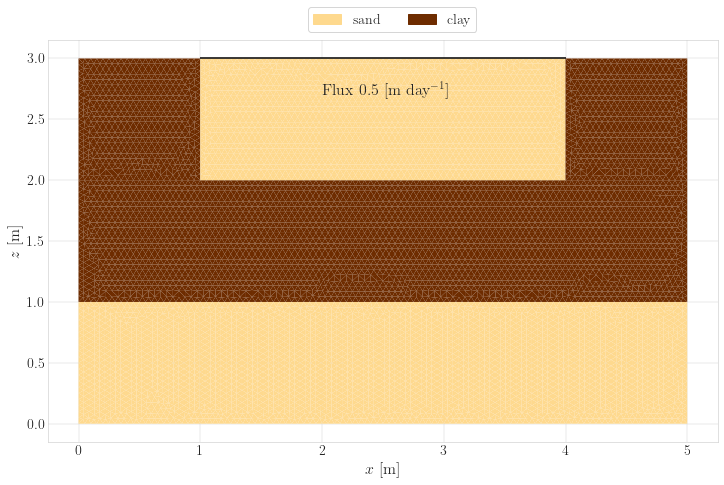

In [21]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
ax.hlines(3,xmin=1, xmax=4)
ax.annotate('Flux $0.5$ [m day$^{-1}$]', xy=(2,2.7))
whetgeo2D_mesh.show_domain(ax, nodes, triangles, ID, layer_list=['sand','clay'])
# fig.savefig('Kirkland_et_al_1992_TP2_setup.pdf', format='pdf', bbox_inches='tight')


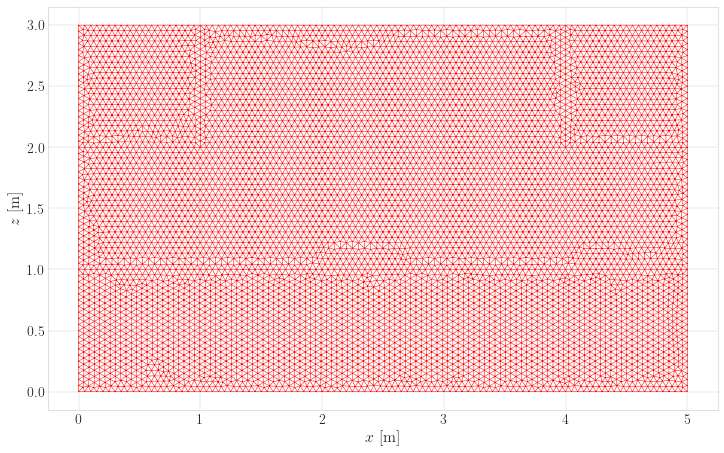

In [22]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
whetgeo2D_mesh.show_unstructured_grid(ax, nodes, triangles)
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')



## Output

In [23]:
ds = xr.open_dataset(project_path+'/output/Kirkland_et_al_TP2_0000.nc')

ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:           (time: 25, x: 14000, xDual: 21160, z: 14000, zDual: 21160)
Coordinates:
  * z                 (z) float64 0.8775 0.9684 0.939 ... 2.167 2.165 2.534
  * x                 (x) float64 2.525 2.445 2.156 1.746 ... 4.064 4.936 4.935
  * xDual             (xDual) float64 2.53 2.51 2.534 ... 4.945 4.945 4.054
  * zDual             (zDual) float64 0.8912 0.878 0.8632 ... 2.541 2.157 2.159
  * time              (time) datetime64[ns] 2017-01-01 ... 2017-01-02
Data variables:
    psi               (time, x) float64 ...
    psiIC             (x) float64 ...
    T                 (x) float64 ...
    theta             (time, x) float64 ...
    waterVolume       (time, x) float64 ...
    saturationDegree  (time, x) float64 ...
    darcyVelocity     (time, xDual) float64 ...
    darcyVelocityX    (time, xDual) float64 ...
    darcyVelocityZ    (time, xDual) float64 ...
    errorVolume       (time) float64 ...
Attributes:
    Descript

### Saturation degree

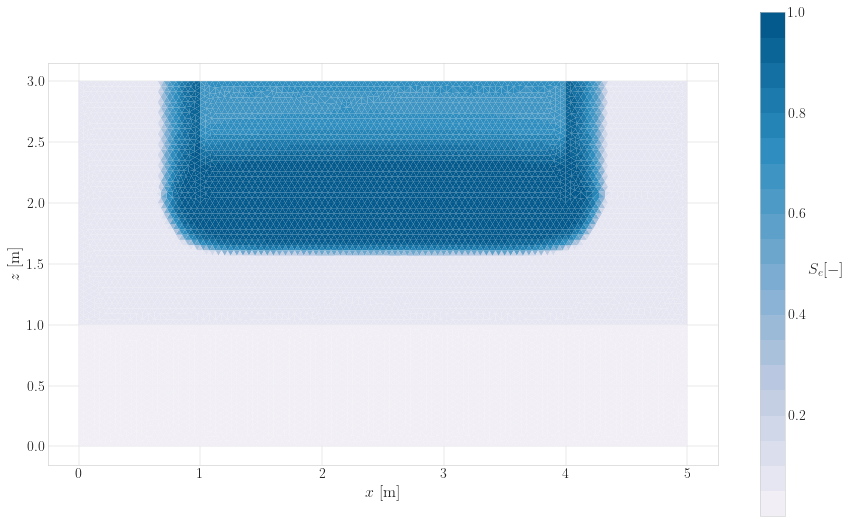

In [28]:
fig, ax = plt.subplots(figsize=(15,15/1.618))
plot_2D(ax, nodes, triangles, ds.saturationDegree.values[-3,:], colormap_desired_bins =20, colorbar_name='$S_e [-]$')
